In [ ]:
# En este jupyter estoy ordenando los países según el gdp per capita que tiene cada uno. En primer lugar lo separo por continentes y cojo de cada continente los 5 por la cabeza y por la cola y los añado a un dataframe con los valores ordenados por el gdp. Después vemos la correlación que tienen con un heatmap. 

# 1) Definir la función que saca dos subplots comparando todoos los valores
# 2) Definir la función que saca 4 sublots, comparando los 20 países que más pib tienen con su ratio de muertes para que se vea más claro
# 3) Hacerlo por continentes

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
covid_groupby = pd.read_csv("0-covid_groupby.csv")
covid_groupby.drop("Unnamed: 0", axis=1, inplace=True)
covid_groupby

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.50,1803.987,0.511
1,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795
2,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748
3,North America,Antigua and Barbuda,32.1,6.933,4.631,88.436,11.564,1251.0,42.0,3.357314,3.80,21490.943,0.778
4,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,South America,Venezuela,29.0,6.614,3.915,89.471,10.529,217603.0,2428.0,1.115793,0.80,16745.022,0.711
151,Asia,Vietnam,32.6,7.150,4.718,88.132,11.868,4512.0,37.0,0.820035,2.60,6171.884,0.704
152,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470
153,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584


In [3]:
covid_groupby.groupby("continent").count()

,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
continent,,,,,,,,,,,,
Africa,39,39,39,39,39,39,39,39,39,39,39,39
Asia,42,42,42,42,42,42,42,42,42,42,42,42
Europe,39,39,39,39,39,39,39,39,39,39,39,39
North America,20,20,20,20,20,20,20,20,20,20,20,20
Oceania,3,3,3,3,3,3,3,3,3,3,3,3
South America,12,12,12,12,12,12,12,12,12,12,12,12


In [4]:
def cases_continent(continent):
    x = covid_groupby[covid_groupby["continent"] == continent ]
    return x

In [5]:
def sort_value(continent, value="gdp_per_capita"):
    y = continent.sort_values(value, ascending=False)
    print(len(y.values))
    if len(y.values) > 10:
        x = y.head(5).append(y.tail(5))
        return x
    return y


In [6]:
africa = cases_continent("Africa")
asia = cases_continent("Asia")
europe = cases_continent("Europe")
north_america = cases_continent("North America")
oceania = cases_continent("Oceania")
south_america = cases_continent("South America")


In [7]:
s_gdp_africa = sort_value(africa)
s_gdp_asia = sort_value(asia)
s_gdp_europe = sort_value(europe)
s_gdp_north_america = sort_value(north_america)
s_gdp_south_america = sort_value(south_america)
s_gdp_oceania = sort_value(oceania)

39
42
39
20
12
3


In [8]:
gdp_mundo = pd.concat([s_gdp_africa, s_gdp_asia, s_gdp_europe, s_gdp_north_america, s_gdp_south_america, s_gdp_oceania], axis=0)
gdp_mundo_sorted = gdp_mundo.sort_values("gdp_per_capita", ascending=False)
gdp_mundo_sorted.reset_index(inplace=True, drop=True)
gdp_mundo_sorted

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Qatar,31.9,1.307,0.617,98.076,1.924,213855.0,536.0,0.250637,1.20,116935.600,0.848
1,Europe,Luxembourg,39.7,14.312,9.842,75.846,24.154,69239.0,808.0,1.166972,4.51,94277.965,0.916
2,Asia,Singapore,42.4,12.922,7.049,80.029,19.971,61651.0,31.0,0.050283,2.40,85535.383,0.938
3,Asia,Brunei,32.4,4.591,2.382,93.027,6.973,232.0,3.0,1.293103,2.70,71809.251,0.838
4,Europe,Ireland,38.7,13.928,8.678,77.394,22.606,254870.0,4941.0,1.938635,2.96,67335.293,0.955
5,Asia,United Arab Emirates,34.0,1.144,0.526,98.330,1.670,548681.0,1637.0,0.298352,1.20,67293.483,0.890
6,Asia,Kuwait,33.7,2.345,1.114,96.541,3.459,293574.0,1701.0,0.579411,2.00,65530.537,0.806
7,Europe,Norway,39.7,16.821,10.813,72.366,27.634,119814.0,774.0,0.646001,3.60,64800.057,0.957
8,Europe,Switzerland,43.1,18.436,12.644,68.920,31.080,683400.0,10752.0,1.573310,4.53,57410.166,0.955
9,North America,United States,38.3,15.413,9.732,74.855,25.145,32997331.0,587219.0,1.779595,2.77,54225.446,0.926


In [58]:
def visualization_heatmap(df):
    plt.figure(figsize=(15,10))
    sns.heatmap(df.corr(), annot=True)

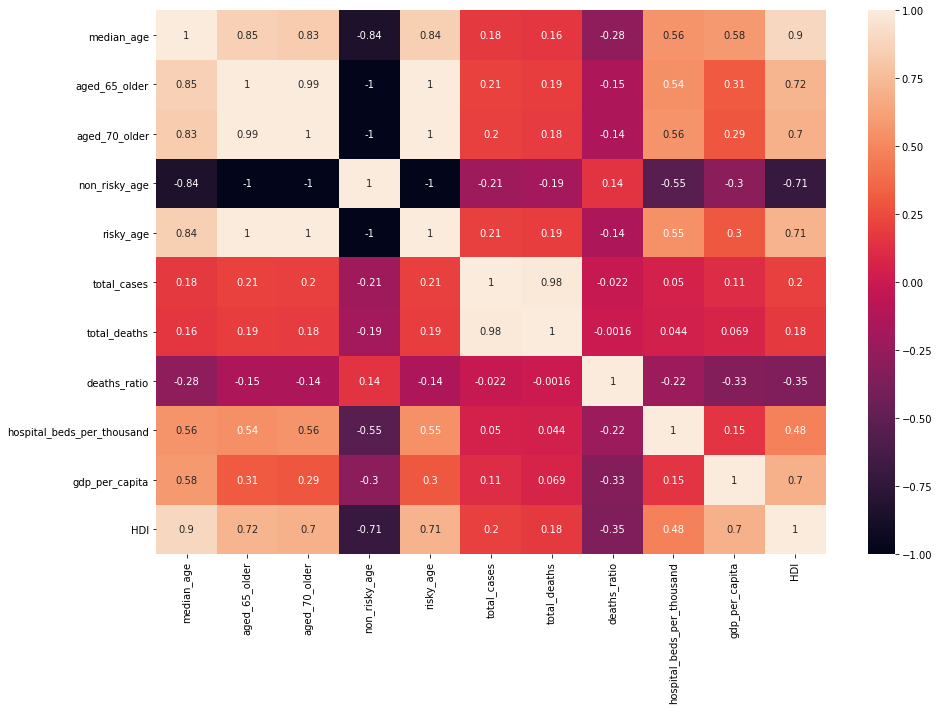

In [59]:
visualization_heatmap(gdp_mundo_sorted)

In [49]:
def subplot_bar(x1, x2, y, data, title1, title2):

    plt.figure(figsize=(20,40))

    plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x1, y=y, data=data, color="b", alpha=0.6, label=x1).set(title=title1)
    plt.legend()

    plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x2, y=y, data=data, color="m", alpha=0.6, label=x2).set(title=title2, ylabel=None, yticklabels=[])
    plt.legend()
    plt.subplots_adjust(wspace=0.02, hspace=0)

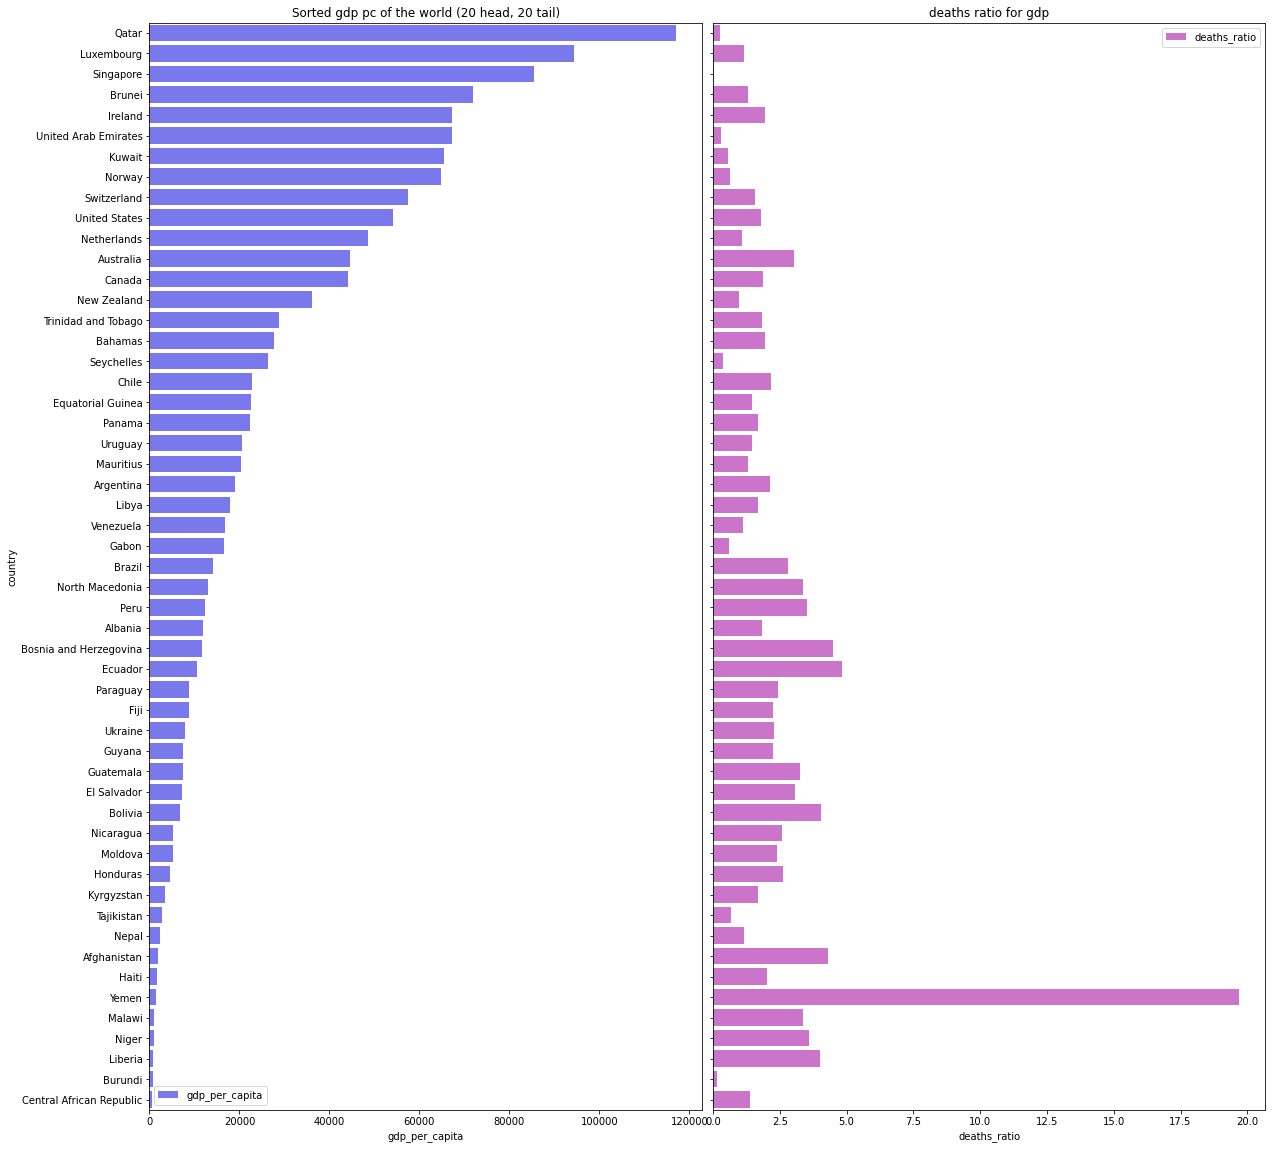

In [50]:
subplot_bar("gdp_per_capita", "deaths_ratio", "country", gdp_mundo_sorted, "Sorted gdp pc of the world (20 head, 20 tail)", "deaths ratio for gdp")

In [ ]:
visualizacion_cuatro(gdp_mundo_sorted,'WORLD GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp" )

In [52]:
def visualizacion_cuatro(data, suptitle, x1, x2, y, t1, t2, t3, t4):

    fig, axes = plt.subplots(2, 2, figsize=(20,20))
    fig.suptitle(suptitle)

    sns.barplot(ax=axes[0, 0], data=data.head(25), x=x1, y=y, color="b", alpha=0.5).set(xlabel=None)

    sns.barplot(ax=axes[0, 1], data=data.head(25), x=x2, y=y, color="m", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])

    sns.barplot(ax=axes[1, 0], data=data.tail(25), x=x1, y=y, color="b", alpha=0.5)

    sns.barplot(ax=axes[1, 1], data=data.tail(25), x=x2, y=y, color="m", alpha=0.5).set(ylabel=None, yticklabels=[])

    axes[0, 0].set_title(t1)
    axes[0, 1].set_title(t2)
    axes[1, 0].set_title(t3)
    axes[1, 1].set_title(t4)
    plt.subplots_adjust(wspace=0.02, hspace=0.1)

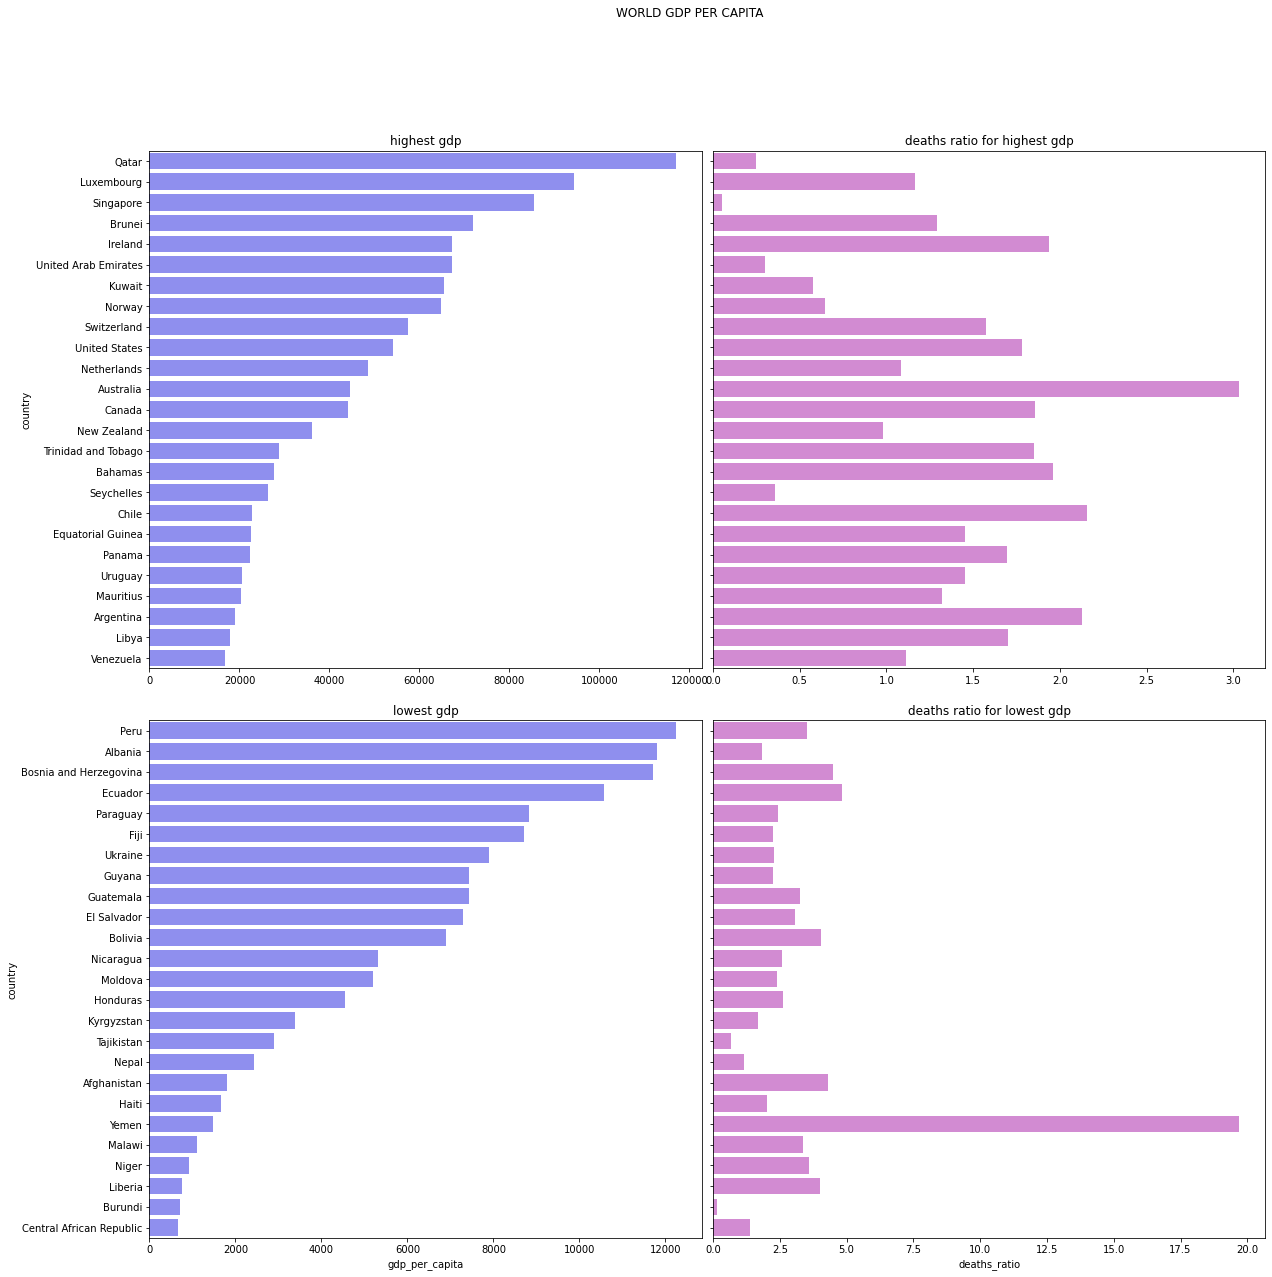

In [53]:
visualizacion_cuatro(gdp_mundo_sorted,'WORLD GDP PER CAPITA', 'gdp_per_capita', 'deaths_ratio', 'country', "highest gdp", "deaths ratio for highest gdp", "lowest gdp", "deaths ratio for lowest gdp" )